# 1. Read and import data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv('./data/salary.csv', sep='|')

In [3]:
dataset.head(2)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN


# 2. Cleaning the data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34746 entries, 0 to 34745
Data columns (total 15 columns):
id                      34746 non-null int64
job_title               34746 non-null object
location                34746 non-null object
salary_currency         34742 non-null object
career_level            34746 non-null object
experience_level        30205 non-null object
education_level         34746 non-null object
employment_type         33402 non-null object
job_function            34746 non-null object
job_benefits            27330 non-null object
company_process_time    24555 non-null object
company_size            29103 non-null object
company_industry        33132 non-null object
job_description         34745 non-null object
salary                  9352 non-null float64
dtypes: float64(1), int64(1), object(13)
memory usage: 4.0+ MB


In [5]:
# Check null values
dataset.isnull().sum()

id                          0
job_title                   0
location                    0
salary_currency             4
career_level                0
experience_level         4541
education_level             0
employment_type          1344
job_function                0
job_benefits             7416
company_process_time    10191
company_size             5643
company_industry         1614
job_description             1
salary                  25394
dtype: int64

**Drop kolom yang tidak diperlukan**

In [6]:
# Remove Column 
dataset = dataset.drop(labels=["id", "salary_currency", "job_benefits", "job_function", "job_description",
"company_process_time", "company_size", "company_industry", "employment_type", "location"], axis=1)

**Mengisi Missing Value Salary**

In [7]:
# Mengisi data salary yang nan atau null dengan median
dataset['salary'].fillna(dataset.groupby(["experience_level"])['salary'].transform('median'), inplace=True)
dataset['salary'] = dataset['salary'].round(0)

**Mengisi Missing Value Experience Level**

In [8]:
# Convert experience_level str => float
dataset["experience_level"] = dataset["experience_level"].str.replace("\D", "").fillna(0).astype('float')

# Mengisi data experience_level yang 0 dengan median
dataset['experience_level'].replace(to_replace=0, value=dataset.groupby(["job_title"])['experience_level'].transform('median'), inplace=True)

**Mapping Education Level**

In [9]:
# edu = []
# for i in dataset['education_level']:
#     if i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)":
#         edu.append('D3 - S2')
#     elif i == "Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
#         edu.append("S1 - S2")
#     elif i == "Sarjana (S1)":
#         edu.append("S1")     
#     elif i == "SMA, SMU/SMK/STM":
#         edu.append("SMA/SMU")      
#     elif i == "SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)":
#         edu.append("SMA/SMU - S1")  
#     elif i == "SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma)":
#         edu.append("SMA/SMU - S1")
#     elif i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
#         edu.append("D3 - S2") 
#     elif i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma)":
#         edu.append("D3 - S1") 
#     elif i == "SMA, SMU/SMK/STM, Sarjana (S1)":
#         edu.append("SMA/SMU - S1") 
#     elif i == "Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2), Doktor (S3)":
#         edu.append("S1 - S3")   
#     elif i == "Diploma Pascasarjana, Gelar Professional, Magister (S2)":
#         edu.append("S1 - S2")  
#     elif i == "Sarjana (S1), Doktor (S3)":
#         edu.append("S1 - S3")  
#     elif i == "Sertifikat Professional, D3 (Diploma), D4 (Diploma), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
#         edu.append("D3 - S2")         
#     elif i == "Diploma Pascasarjana, Gelar Professional, Magister (S2), Doktor (S3)":
#         edu.append("S1 - S2")   
#     elif i == "Doktor (S3)":
#         edu.append("S3")     
#     elif i == "SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
#         edu.append("SMA/SMU - S2")  
#     elif i == "SMA, SMU/SMK/STM, Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)":
#         edu.append("SMA/SMU - S2")
#     elif i == "SMA, SMU/SMK/STM, Sarjana (S1), Doktor (S3)":
#         edu.append("S1 - S3")                                                                                                                                                                                         
#     else:
#         edu.append('Tidak terspesifikasi')
# dataset['education_level'] = edu

**Cek Duplikasi Data**

In [10]:
print("Duplikasi Sebelum Di Drop: ", dataset.duplicated().sum())
dataset.drop_duplicates(keep='first', inplace=True)
print("Duplikasi Setelah Di Drop: ", dataset.duplicated().sum())

Duplikasi Sebelum Di Drop:  6976
Duplikasi Setelah Di Drop:  0


**Outlier**

In [11]:
dataset.dropna(inplace=True)

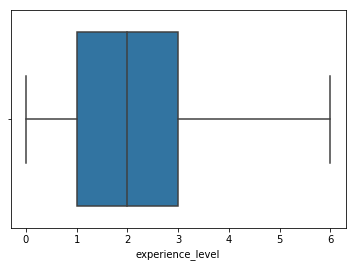

In [12]:
# Experience
per25Exp = dataset['experience_level'].quantile(0.25)
per75Exp = dataset['experience_level'].quantile(0.75)
iqrExp = per75Exp - per25Exp

lower_limit = per25Exp - 1.5 * iqrExp
upper_limit = per75Exp + 1.5 * iqrExp

dataset = dataset[~((dataset["experience_level"] < (lower_limit)) | (dataset["experience_level"] > (upper_limit)))]

sns.boxplot(dataset["experience_level"])
plt.show()

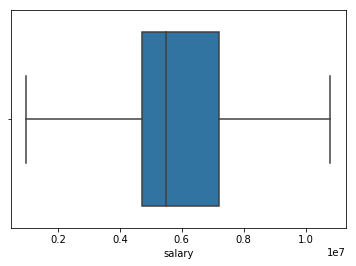

In [13]:
# Salary
per25Salary = dataset['salary'].quantile(0.25)
per75Salary = dataset['salary'].quantile(0.75)
iqrSalary = per75Salary - per25Salary

lower_limit = per25Salary - 1.5 * iqrSalary
upper_limit = per75Salary + 1.5 * iqrSalary

dataset = dataset[~((dataset["salary"] < (lower_limit)) | (dataset["salary"] > (upper_limit)))]

sns.boxplot(dataset["salary"])
plt.show()

Result Cleaning

In [14]:
dataset.shape

(22631, 5)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22631 entries, 0 to 34745
Data columns (total 5 columns):
job_title           22631 non-null object
career_level        22631 non-null object
experience_level    22631 non-null float64
education_level     22631 non-null object
salary              22631 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.0+ MB


In [16]:
# Check null values
dataset.isnull().sum()

job_title           0
career_level        0
experience_level    0
education_level     0
salary              0
dtype: int64

In [17]:
dataset.describe()

,experience_level,salary
count,22631.000000,2.263100e+04
mean,2.180195,6.045104e+06
std,1.287327,1.963279e+06
min,0.000000,9.600000e+05
25%,1.000000,4.700000e+06
50%,2.000000,5.500000e+06
75%,3.000000,7.200000e+06
max,6.000000,1.080000e+07


# Data Preprocessing

In [18]:
X = pd.DataFrame(dataset, columns=["career_level", "experience_level", "education_level"])
Y = pd.DataFrame(dataset, columns=["salary"])

Metode OLS

In [19]:
modelOLS = smf.ols("salary~career_level + experience_level + education_level", data=dataset).fit()
print(modelOLS.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2329.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:11:20   Log-Likelihood:            -3.4595e+05
No. Observations:               22631   AIC:                         6.920e+05
Df Residuals:                   22606   BIC:                         6.922e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                        coef    std err          t      P>|t|      [0.025      0.9

In [20]:
yPredOLS = modelOLS.predict(X)
yPredOLS.head()

0    9.690896e+06
1    9.987757e+06
2    8.373312e+06
3    9.631795e+06
4    5.675670e+06
dtype: float64

In [21]:
mean_squared_error(Y, yPredOLS)

1109883393784.7217

Metode Robust Reggression

In [22]:
modelRLM = smf.rlm("salary~career_level + experience_level + education_level", data=dataset).fit()
print(modelRLM.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 salary   No. Observations:                22631
Model:                            RLM   Df Residuals:                    22606
Method:                          IRLS   Df Model:                           24
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 09 Jun 2023                                         
Time:                        17:11:22                                         
No. Iterations:                     5                                         
                                                                                                                                                        coef    std err          z      P>|z|      [0.025      0.9

In [23]:
yPredRLM = modelRLM.predict(X)
yPredRLM.head()

0    1.006012e+07
1    1.017139e+07
2    8.562667e+06
3    9.973301e+06
4    5.797221e+06
dtype: float64

In [24]:
mean_squared_error(Y, yPredRLM)

1161338536651.5696

Metode Random Forest

In [25]:
xRF = dataset.drop("salary", axis=1)
yRF = dataset["salary"]

In [26]:
X_train, X_test, y_train, y_test = train

NameError: name 'train' is not defined

**4. Visualization Data**